<a href="https://colab.research.google.com/github/Jeetup-co/Grow-Web-Scraping/blob/main/Webscrapin_Grow_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grow Stocks Data Analysis :- Web Scraping

Objective:
Collect 10 Companies listing Data(company,price,change,Volumn)


Tools:
- Python
- requests
- BeautifulSoup
- pandas
- matplotlib
- seaborn


Importing Libraries And Providing a HTTP header

In [20]:
# Importing Libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time

headers = {'user-agent':'Mozilla/5.0 \
            (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/84.0.4147.105 Safari/537.36'}

Now Scraping the Data From the Website ,Clean the Data and Collect them into a List so we can perform other process to get insights

In [13]:
import re

url = ['https://groww.in/stocks/tata-steel-ltd',
       'https://groww.in/stocks/jindal-steel-power-ltd',
       'https://groww.in/stocks/jsw-steel-ltd',
       'https://groww.in/stocks/hindustan-zinc-ltd',
       'https://groww.in/stocks/vedanta-ltd',
       'https://groww.in/stocks/oil-natural-gas-corporation-ltd',
       'https://groww.in/stocks/hindustan-aeronautics-ltd',
       'https://groww.in/stocks/indian-oil-corporation-ltd',
       'https://groww.in/stocks/bharat-petroleum-corporation-ltd',
       'https://groww.in/stocks/hindustan-unilever-ltd']

all_stocks_data = [] # Initialize an empty list to store all scraped data

# Loop to extract company names, price, change, and volume with corrected selectors
for single_url in url:
    response = requests.get(single_url, headers=headers)
    soup = BeautifulSoup(response.content,'html.parser')

    company_name = 'N/A'
    price_value = 'N/A'
    change_value = 'N/A'
    volume_value = 'N/A'

    # Company name
    company_element = soup.find('h1', {'class': 'lpu38Head truncate displaySmall'})
    if company_element:
        company_name = company_element.text.strip()

    # Price
    price_div_element = soup.find('div', {'class': 'lpu38Pri'})
    if price_div_element and price_div_element.find('div'):
        price_value = price_div_element.find('div').text.strip()

    # Change (using regex for positive/negative class)
    change_element = soup.find('div', class_=re.compile(r'bodyBaseHeavy (contentPositive|contentNegative)'))
    if change_element:
        change_value = change_element.text.strip()

    # Volume
    # Find the div containing the text 'Volume' and then its next sibling (span with the value)
    volume_label_element = soup.find('div', class_='stockPerformance_keyText__f0fuN stockPerformance_keyTextStk__shi_y left-align bodyBase', string='Volume')
    if volume_label_element:
        volume_span_element = volume_label_element.find_next_sibling('span', class_='stockPerformance_value__g7yez bodyLargeHeavy')
        if volume_span_element:
            volume_value = volume_span_element.text.strip()

    # Append the extracted data as a dictionary to the list
    all_stocks_data.append({
        "Company": company_name,
        "Price": price_value,
        "Change": change_value,
        "Volume": volume_value
    })
    time.sleep(3) # Increased delay to avoid overwhelming the server

Converting Data From List to DataFrame so we can Visualize the details

In [14]:
column_names = ["Company", "Price", "Change", "Volume"]
df = pd.DataFrame(all_stocks_data, columns=column_names)

print(df.head(10))

                         Company      Price             Change       Volume
0                     Tata Steel    ₹181.68   +1.60 (0.89%) 1D  1,76,83,779
1                   Jindal Steel  ₹1,067.00  +13.20 (1.25%) 1D    11,83,962
2                      JSW Steel  ₹1,171.80   +7.00 (0.60%) 1D     9,92,822
3                 Hindustan Zinc    ₹611.05   -1.40 (0.23%) 1D    41,60,972
4                        Vedanta    ₹603.25   -1.15 (0.19%) 1D    33,80,136
5  Oil & Natural Gas Corporation    ₹237.68   -2.70 (1.12%) 1D    49,33,357
6          Hindustan Aeronautics  ₹4,385.00   -3.70 (0.08%) 1D     2,99,094
7         Indian Oil Corporation    ₹165.64   -0.82 (0.49%) 1D    85,37,253
8   Bharat Petroleum Corporation    ₹381.20   -2.80 (0.73%) 1D    55,79,283
9             Hindustan Unilever  ₹2,320.00   +4.10 (0.18%) 1D     5,62,412


# Live Stock Data Visualization

Creating a User Define Function for cleared the Volumn Column by removing the formatting characters and handling the indian and international numeric suffix and safely converting the mixed data type to numeric values.

In [15]:
def convert_volume(value):
    # Convert the value to string to handle potential floats (like NaN) or other types
    value_str = str(value)

    # Handle 'nan' string representation that comes from float('nan')
    if value_str.lower() == 'nan':
        return float('nan')

    # Remove commas
    value_str = value_str.replace(',', '')

    # Convert based on suffixes
    if 'K' in value_str:
        return float(value_str.replace('K', '')) * 1_000
    elif 'M' in value_str:
        return float(value_str.replace('M', '')) * 1_000_000
    elif 'Cr' in value_str:
        return float(value_str.replace('Cr', '')) * 10_000_000
    else:
        try:
            return float(value_str)
        except ValueError:
            # Return NaN if conversion to float fails (e.g., unexpected string format)
            return float('nan')

# Apply the function after explicitly converting the 'Volume' column to string type
df['Volume'] = df['Volume'].astype(str).apply(convert_volume)


In [16]:
print(len(all_stocks_data))
print(pd.DataFrame(all_stocks_data)['Company'])


10
0                       Tata Steel
1                     Jindal Steel
2                        JSW Steel
3                   Hindustan Zinc
4                          Vedanta
5    Oil & Natural Gas Corporation
6            Hindustan Aeronautics
7           Indian Oil Corporation
8     Bharat Petroleum Corporation
9               Hindustan Unilever
Name: Company, dtype: object


📊 Stock Price Comparison

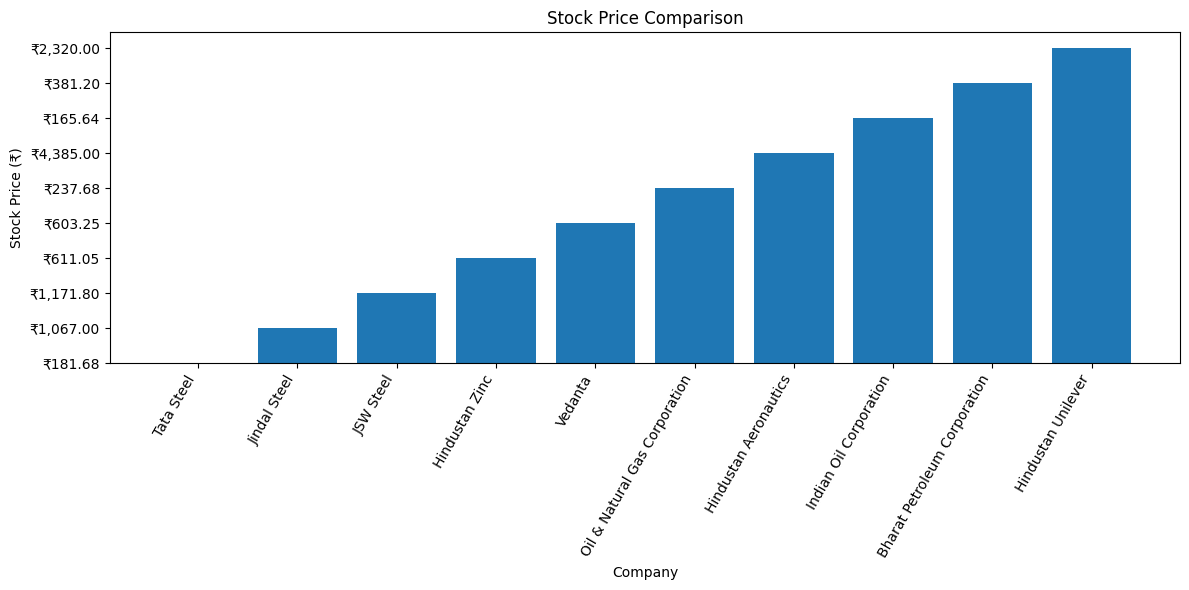

In [17]:
plt.figure(figsize=(12, 6))   # IMPORTANT
plt.bar(df['Company'], df['Price'])
plt.xticks(rotation=60, ha='right')
plt.xlabel('Company')
plt.ylabel('Stock Price (₹)')
plt.title('Stock Price Comparison')
plt.tight_layout()
plt.show()


Details:-

- Hindustan Unilever has the highest stock price, indicating a premium FMCG stock.

- Bharat Petroleum Corporation and Indian Oil Corporation also trade at relatively higher price levels.

- Metal sector stocks like Tata Steel, Jindal Steel, and JSW Steel are priced significantly lower compared to FMCG and PSU stocks.

- Stock price alone does not indicate performance or value; it reflects face value, market perception, and share structure.

📈 Volume vs Price Change (1D)

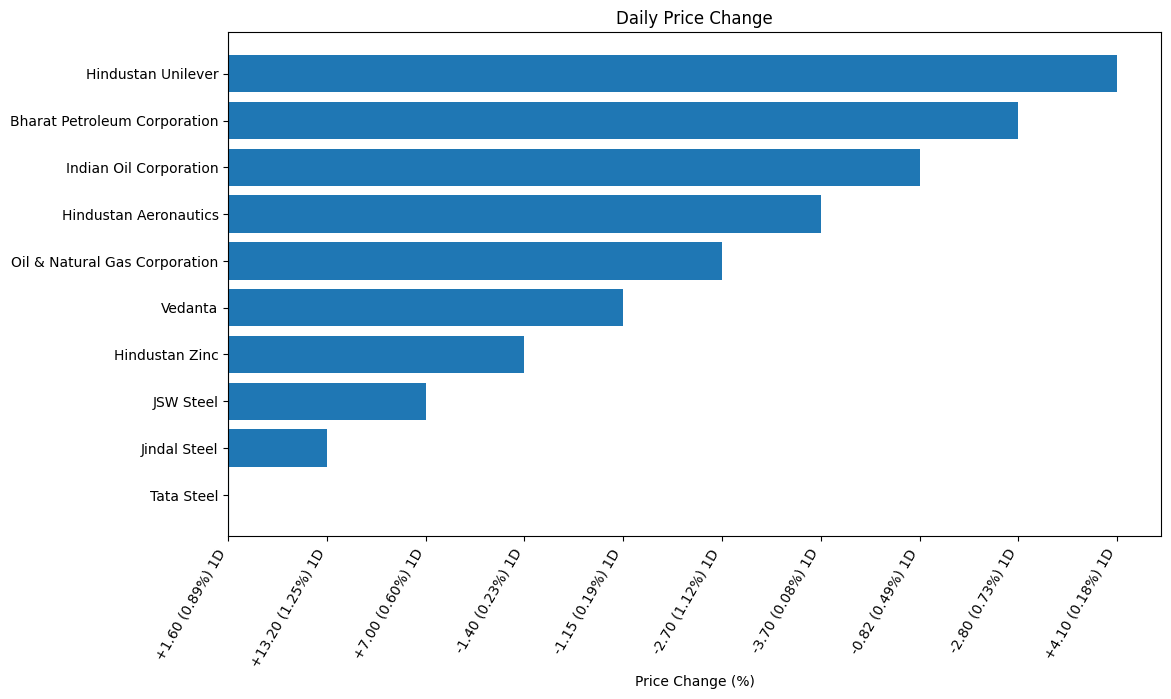

In [18]:
plt.figure(figsize=(12, 6))
plt.barh(df['Company'], df['Change'])
plt.axvline(0)
plt.xlabel('Price Change (%)')
plt.title('Daily Price Change')
plt.tight_layout()
plt.xticks(rotation=60, ha='right')
plt.show()


📌 Insight:-

- Bharat Petroleum Corporation and Indian Oil Corporation show high trading volumes, indicating strong market participation.

- Hindustan Aeronautics and ONGC also exhibit significant volume with moderate price changes.

- Metal stocks such as Tata Steel, JSW Steel, and Jindal Steel show relatively lower trading volumes.

- High volume does not always correspond to the highest price change, highlighting that volume and price movement are related but not perfectly correlated.

📊 Trading Volume Comparison

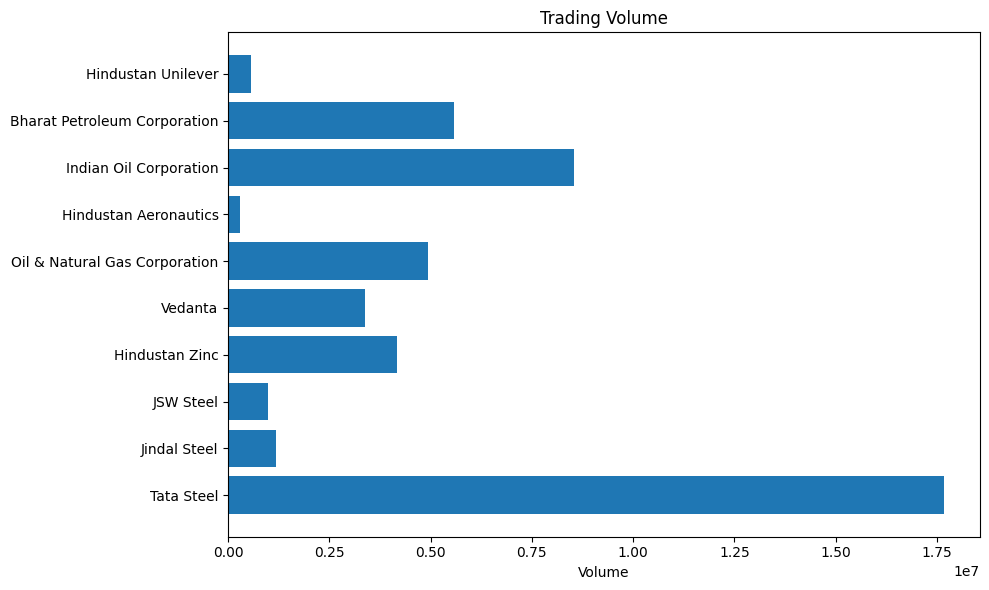

In [19]:
plt.figure(figsize=(10, 6))
plt.barh(df['Company'], df['Volume'])
plt.xlabel('Volume')
plt.title('Trading Volume')
plt.tight_layout()
plt.show()


📌 Insight:-

- Tata Steel shows the highest trading volume, indicating strong liquidity and active trading interest.

- Indian Oil Corporation and Bharat Petroleum Corporation also record high volumes, reflecting strong participation in PSU energy stocks.

- Hindustan Zinc and Vedanta show moderate trading activity within the metals sector.

- Hindustan Unilever and Hindustan Aeronautics have comparatively lower volumes, suggesting less frequent trading.